# T1 V1
### Basics of Ensemble Techniques

- How do we combine the models
- If all of these models make different predictions, how do you select the final value?

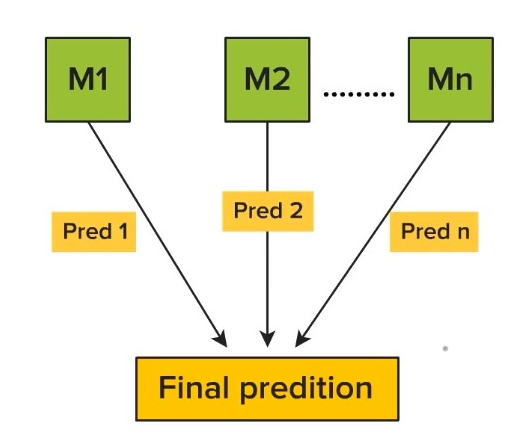

#### For Classification Problem

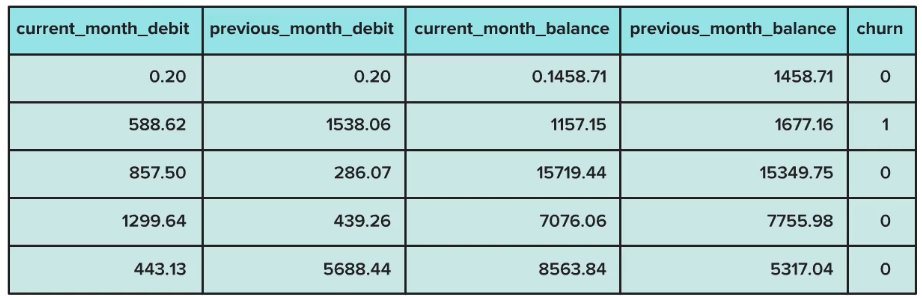

- How to comibne different predictions?
    * Mode/Vote
    * No issues if pred 1 = pred 2 = pred 3
    * The majority class is the final prediction
    
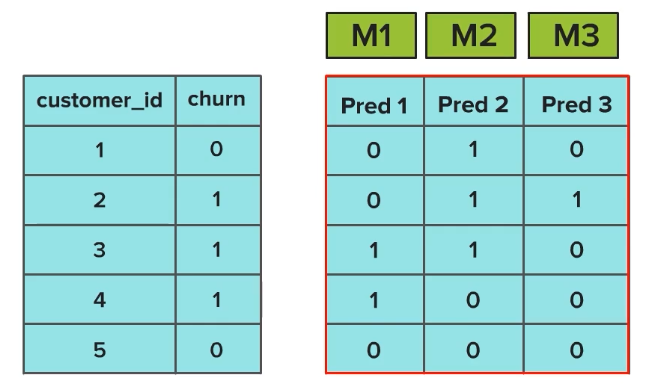

- The majority class is the final prediction
    * Max Voting
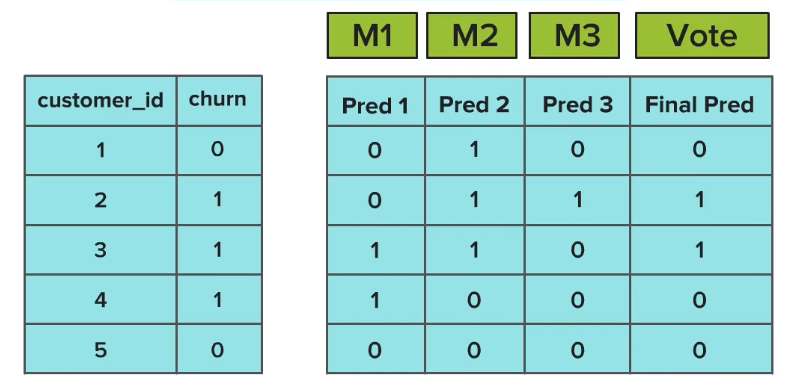

#### For Regression Problem

- Averaging
    * Mean of all predicted values

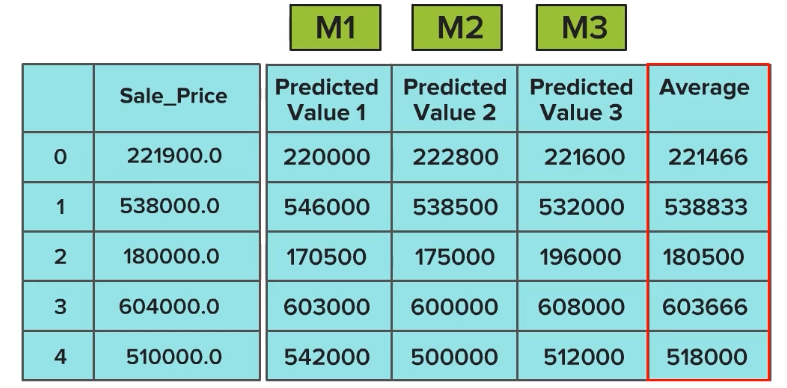

- Pros:
    * Capture most of the diverse signals or patterns
    * Less incorrect predictions
    * Reduce overfitting
    * Performance

- Cons:
    * Increase Complexity
    * Not interpretable as a whole\
    * Increase time complexity and computational requirement

# T2 V1
### Random Forest 1

#### Bootstrap Aggregation / Bagging
- How to introduce diveristy in the models when we have a limited number of observations in our dataset? 
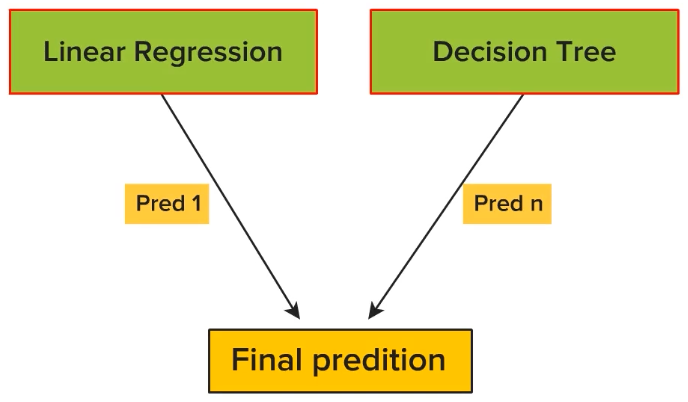

#### Data Manupulation
- What is the issue with this approch
    * Models are likely to overfit
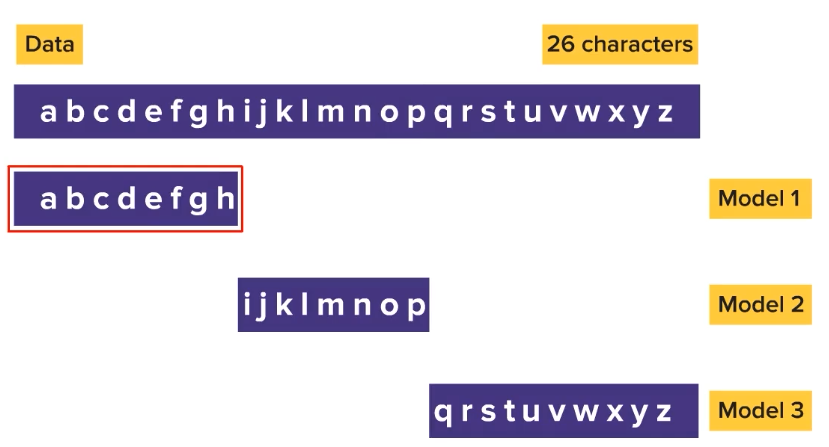

#### Bootstrap Sampling
- Each model is given a random sample from the original data with replacement
- Selection is random so some of the values may repeat
- Bootstrap sampling is the core idea in the bagging tehnique

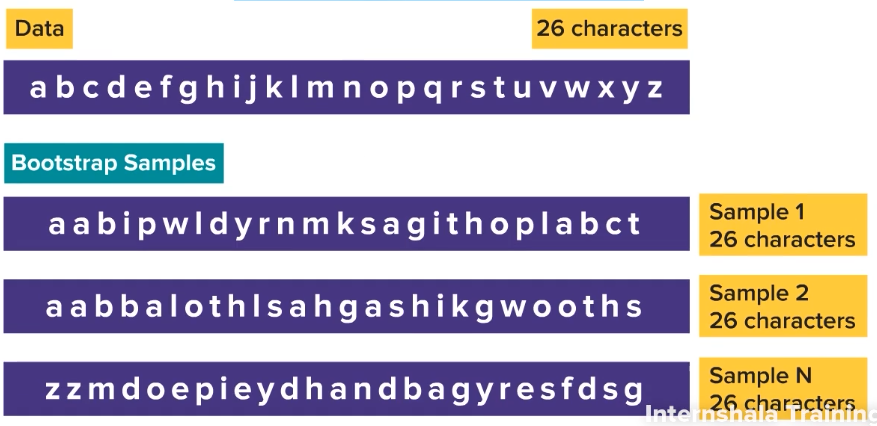

#### Bagging
- It foucses on brining the diversity in the model using diverse data

#### Random Forest:
- Special case of bagging
- Decision tree is used as the base model
- One of the most popular ensemble algorithms

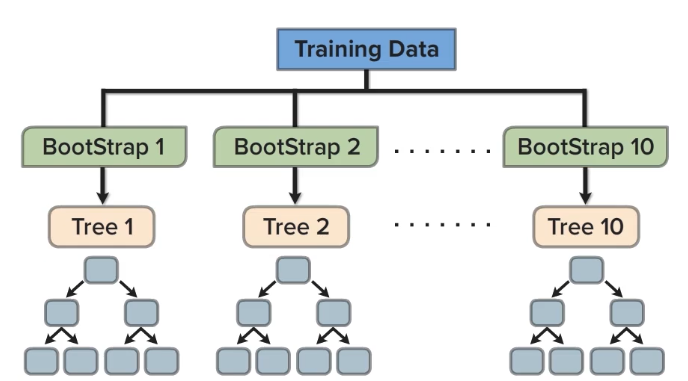

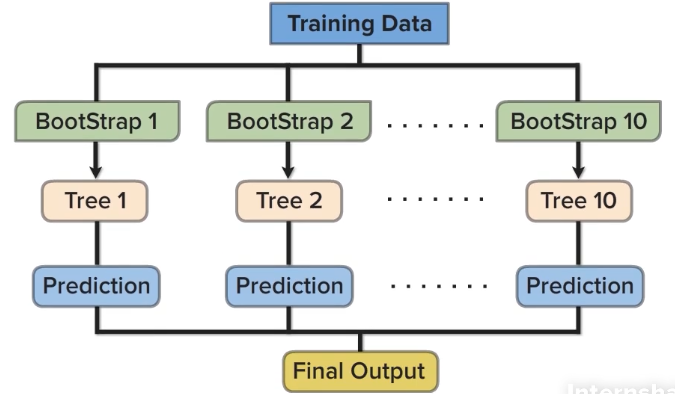

- Why Random Forest?
    * Random Forest performs a random sampling of data points and features
    * The data points/row sampling is done at the tree level

#### Feature Sampling
- The feature sampling is done at the split level

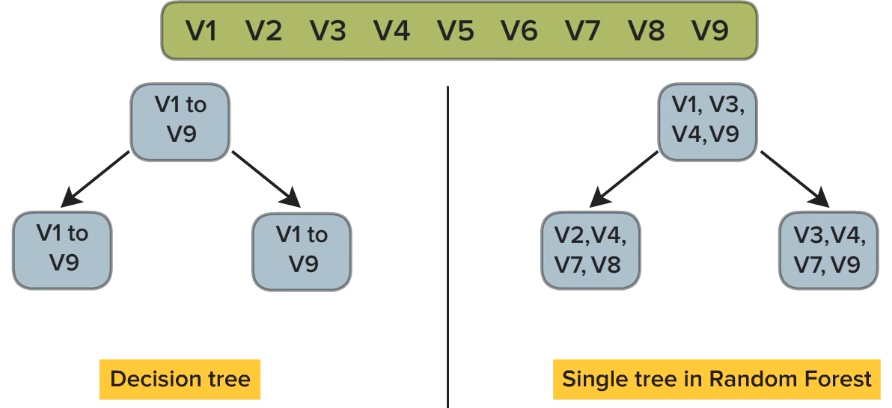
* The same process is repeated for every tree
* This gives random forest, a two fold effect of bootstrap sampling as compared to simple bagging with decision tree as base estimator

# T3 V1
### Implementation of Bagging and Random Forest

Requirment:
            - sklearn (version 0.22 or newer)
            - !pip install -U scikit-learn

In [1]:
import pandas as pd

In [ ]:
data = pd.read_csv('churn_prediction_simple.csv')
data.info()

In [ ]:
# separating ddependent and independent variables
x = data.drop(columns = ['churn', 'customer_id'])
y = data['churn']

In [ ]:
# scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [2]:
# splitting the dataset
# stratify y : both test and train data contains the target variable with equal distribution
# random_state 101 : this ensures that the data split in the same way whenever the random state is 101, this ensures reproducible results

from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_x, y, train_size = 0.80, stratify = y, random_state = 101)
x_trian.shape, x_test.shape, y_train.shape, y_test.shape

NameError: name 'scaled_x' is not defined

#### Model Building, Bagging Logistic Regression

In [ ]:
from sklearn.ensemble import BaggingClassifier as BC
classifier = BC()
classifier.fit(x_train, y_train)

- base_estimator
    * Requires a machine learning model which will be used with the bootstrapped data
    * None: The base model used is a decision Tree
- max_samples
    * Maximum no of samples of each model should receives
    * The fraction of the data originally given
- n_estimator
    * The number of models to be built for training over the data
- n_jobs
    * The number of CPU cores one wants to use during the training of BaggingClassifier
    * -1 means all the available CPU cores will be used

#### Bagging of Logistics Regression

In [ ]:
from skelarn.linear_model import LogisticRegression as LR

classifier = BC(base_estimator = LR(),
               n_estimators = 150,
               n_jobs = -1,
               random_state = 42)
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, predicted_values))

In [ ]:
predicted_values = classifier.predict(x_test)
print(classifitcation_report(y_test, predicted_values))

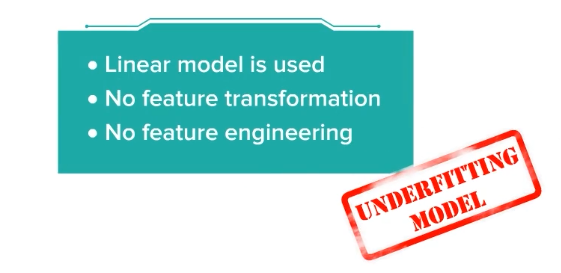

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC()

- The parameters of the bagging technique and the parameters of the decision tree classifier both are present
- There is no feature sampling parameter here because feature sampling is important for the random forest

In [ ]:
classifier.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_repor(y_train, predicted_values))

In [ ]:
predicted_values = classifier.predict(x_test)
print(classification_report(y_test, predicted_values))

# T3 V2
### Hyperparameter Tunning in Random Forest

- How does the bagging parameters affect the mahchine learning models

In [ ]:
from sklearn.metrics import f1_score
def calc_score(model, x1, y1, x2, y2):
    
    model.fit(x1, y1)
    
    predict = mode.predict(x1)
    f1 = f1_score(y1, predict)
    
    predict = model.predict(x2)
    f2 = f1_score(y2, predict)
    
    return f1, f2

In [ ]:
# effect : To quickly visualize how the different values of the parametes affect the performances of the model
def effect(train_score, test_score, x_axis, title):
    plt.figure(figsize = (7, 4), dpi = 120)
    plt.plot(x_axis, train_score, color = 'red', label = 'train_score')
    plt.plot(x_axis, test_score, color = 'blue', label = 'test_score')
    plt.title(title)
    plt.legend()
    plt.xlabel('parameter_value')
    plt.ylabel('f1_score')
    plt.show()

- The parameters of the random forest classifier:
#### Hyperparameter Tuning
- max_features
    * The number of random features to be considered at every split
    * sqrt of total number of features
- max_samples
    * The number of bootstrapped samples that every decision tree receives from the original dataset

In [ ]:
classifier = RFC()
classifier.fit(x_train, y_train)

#### n_estimators
- How does the number of decision trees in a random forest affect its performance
- class_weight
    * The weights are assigned based on the bootstrapped sample data each tree receives
- choosing a large no of estimators is not the best idea

In [ ]:
estimators = [i for i in range(1, 600, 10)]
train = []
test = []

for i in estimators:
    model = RFC(class_weight = 'balanced_subsample',
               n_estimators = i,
               n_jobs = -1,
               max_depth = 7,
               random_state = 101)

    f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

In [ ]:
effect(train, test, range(1, 600, 10), 'n_estimators')

#### max_samples
- What is the key takeaway from this visualizaiton?
    * 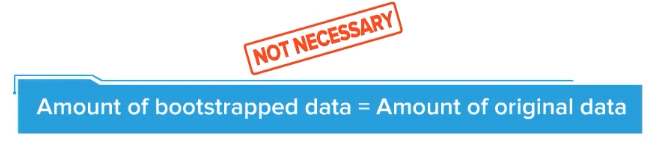

In [ ]:
maxsamples = [i/1000 for i in range(1, 1000)]
train = []
test = []

for i in maxsamples:
    model = RFC(class_weight='balanced_subsample', n_estimators = 50,
               n_jobs = -1, max_depth = 7, random_state = 101, max_samples = i)
    f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

In [ ]:
effect(train, test, maxsamples, 'bootstrap sample fraction')

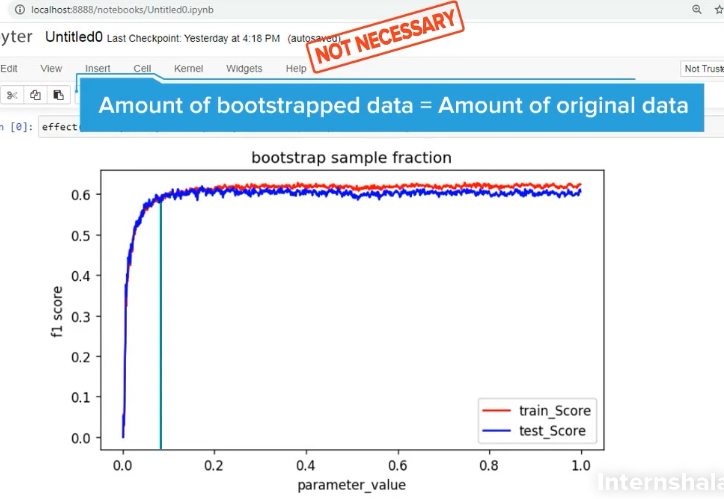

#### max_features
- The number of maximum features provided to each decision tree

In [ ]:
maxfeatures = range(1, x.shape[1])
train = []
test = []

for i in maxfeatures:
    model = RFC(class_weight = 'balanced_subsample', n_estimators = 50,
               n_jobs = -1, max_depth = 7, random_state = 101, max_features = i)
    
    f1, f2 = clac_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

In [ ]:
effect(train, test, maxfeatures, 'number of max features for individual tree')

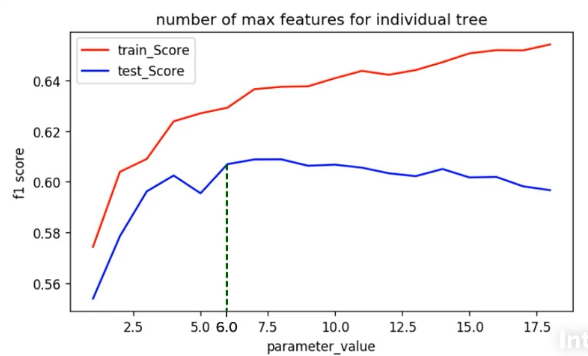

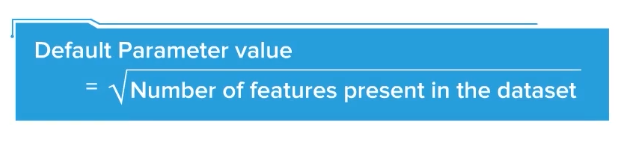

- Techniques to generate better predictions
    * Voting
    * Averaging
- Bagging
    * Bootstrapping
    * Random Forest